# Support Vector Machines
1. Used for Classification, Regression & Outlier Detection
1. AKA Kernelized SVMs are an extension that allows for more complex models that are not defined simply by hyperplanes in the input space

**Advantages**
1. Effective in high dimensional spaces even when number of dimensions is greater than number of samples
1. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient

**Disadvantages**
1. If the number of features is much greater than the number of samples regularization is crucial
1. Number of samples till 10,000 is fine, but around 100,000 the SVM becomes challenging
1. Preprocessing of data is crucial (People rather use Random Forest)
1. Hard to understand why a decision was made, and hard to explain to non expert
1. SVMs do not directly provide probability estimates [Use five-fold cross-validation(Expensive)]

> http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#svm-with-custom-kernel

## Kernels
Some data sets become difficult to classify by linear models, because a line can't possibly separate the classes  
Hence the features can be converted to higher dimension and then possibly a hyperplace can separate the classes  
But doing that is tedious as which feature to target would be a difficult thing in case of higer number of features  

Kernels is a clever mathematical trick that allows us to learn a classifier in a higher-dimensional
space without actually computing the new, possibly very large representation

### Polynomial Kernel
1. Computes all possible polynomials upto a certain degree

### RBF Kernel
1. aka Gaussian Kernel
1. It considers all possible polynomials of all degrees, but the importance of the features decreases for higher degrees

#### Params
1. Gamma - Width of Gaussian Kernel - low value low complexity of model
1. C - Regularization Parameter - small value means restricted model, more linear like behaviour

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
iris_df = pd.read_csv('../data/iris.csv', dtype = {'species': 'category'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
X = iris_df.iloc[:, :-1]
y = iris_df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [5]:
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X_train, y_train)

In [6]:
y_pred = svm.predict(X_test)
y_pred

array(['versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor'], dtype=object)

In [7]:
accuracy_score(y_test, y_pred)

0.94736842105263153

In [8]:
accuracy_score(y_train, svm.predict(X_train))

0.9910714285714286

# Overcoming Overfit
Since the training set score is way high, the Model is overfit

1. The input seems to be distributed over large range
1. SVM is particularly sensitive to that, hence the values need to be normalized using preprocessing

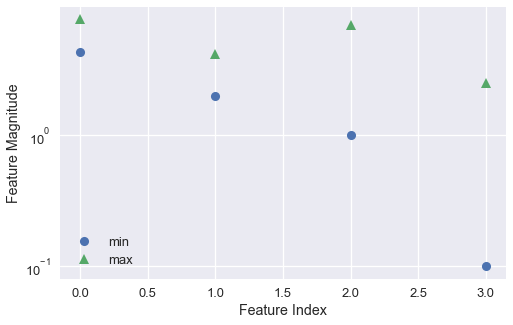

In [9]:
sns.set_context('talk')

plt.figure(figsize = (8, 5))

plt.plot(X_train.min().values, 'o', label = "min")
plt.plot(X_train.max().values, '^', label = "max")

plt.legend(loc = 3)

plt.xlabel("Feature Index")
plt.ylabel("Feature Magnitude")
plt.yscale("Log")

plt.show()

In [10]:
X_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width
44,5.1,3.8,1.9,0.4
91,6.1,3.0,4.6,1.4
33,5.5,4.2,1.4,0.2


# Preprocessing: Min Max Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
svc = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(scaler.transform(X_train), y_train)
svc

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
y_pred = svc.predict(scaler.transform(X_test))
y_pred

array(['versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor'], dtype=object)

In [15]:
accuracy_score(y_test, y_pred)

0.92105263157894735

In [16]:
accuracy_score(y_train, svm.predict(scaler.transform(X_train)))

0.33035714285714285

# Judging the Fit
1. **Underfitting** - If both training and test scores are close (i.e. 0.66 & 0.67)
1. **Overfitting** - If training score is higher (i.e. 0.95 >> 0.65)
1. **Generalized** - If both scores are acceptable (i.e. 0.89 > 0.75 or 0.9 < 1)